In [7]:
import numpy as np
import pandas as pd

class ScratchLogisticRegression():  
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _logistic_hypothesis(self, X):
        if self.no_bias != True:
            X = np.hstack([np.c_[np.ones(X.shape[0])],np.c_[X]]) 
        return X
        
    def fit(self, X, y, X_val=None, y_val=None):
        
        X = self._logistic_hypothesis(X)
        y = np.resize(y,X.shape)
        
        X_mean = X.mean()
        y_mean = y.mean()
        
        part_1 = X-X_mean
        
        part_2 = y-y_mean
        
        covariance = np.sum(part_1 * part_2)
        variance = np.sum(part_1**2)
        
        # calculating the last values of the formula
        B1 = covariance/variance
        B0 = y_mean - np.multiply(B1,X_mean)
        
        self.B1 = B1
        self.B0 = B0
        self.coef_ = [self.B0,self.B0]
        self.n = len(X)
        
        if (X_val is not None) and (y_val is not None): 
            val_X = self._logistic_hypothesis(X_val)
            val_y = np.resize(y_val,val_X.shape)

            val_X_mean = val_X.mean()
            val_y_mean = val_y.mean()
            
            val_part_1 = val_X-val_X_mean
            
            val_part_2 = val_y-val_y_mean

            val_covariance = np.sum(val_part_1 * val_part_2)
            val_variance = np.sum(val_part_1**2)

            # calculating the last values of the formula
            val_B1 = val_covariance/val_variance
            val_B0 = val_y_mean - np.multiply(val_B1,val_X_mean)

            self.val_B1 = val_B1
            self.val_B0 = val_B0
            self.val_X = val_X
            self.val_y = val_y
            # temp prediction for gradient descent
            self._gradient_descent(X, y)
        
        if self.verbose:
            #Outputs the learning process when is set to True
            print("loss {}, val loss {}".format(self.loss, self.val_loss))
        pass
        
    def predict(self, X):
        predictions = self.B0 + np.multiply(self.B1,X)
        self.y_pred = predictions
        pass
        return predictions
    
    
    def _gradient_descent(self, X, y):
        b1 = self.B1
        b0 = self.B0
        val_b1 = self.val_B1
        val_b0 = self.val_B0
        n = self.n
        
        for i in range(self.iter):
            temp_predictions = b0 - np.multiply(b1,X)
            error = y-temp_predictions
            val_temp_predictions = val_b0 - np.multiply(val_b1,self.val_X)
            val_error = self.val_y - val_temp_predictions
            
            # for train
            b1 = b1 - self.lr
            b0 = b0 - self.lr
            
            # for validation
            val_b1 = val_b1 - self.lr
            val_b0 = val_b0 - self.lr
            
            self.loss[i] = ((error)**2).mean()
            self.val_loss[i] = ((val_error)**2).mean()

#**[Problem1] Hypothetical function**

In [8]:
X0 = np.random.random_sample((20,5))
X1 = np.random.random_sample((20,5))
X = np.concatenate([X0,X1],axis=1)
X.shape

(20, 10)

In [9]:
y0 = np.random.random_sample((20,5))
y1 = np.random.random_sample((20,5))
y = np.concatenate([X0,X1],axis=1)
y.shape

(20, 10)

In [10]:
theta = np.random.random_sample(10)

np.dot(X,theta)

array([3.43440517, 2.72737722, 3.01483951, 2.5110801 , 2.3365644 ,
       2.6963302 , 2.92342446, 2.72266337, 2.63394818, 2.53272438,
       2.3850957 , 2.39256838, 2.29949089, 2.72061474, 2.63546644,
       2.6326346 , 1.59549581, 2.89199105, 3.05344189, 2.36428262])

#**[Problem2] Steepest descent**

In [11]:
def _gradient_descent(self, X, y):
    b1 = self.B1
    b0 = self.B0
    val_b1 = self.val_B1
    val_b0 = self.val_B0
    n = self.n

    for i in range(self.iter):
        temp_predictions = b0 - np.multiply(b1,X)
        error = y-temp_predictions
        val_temp_predictions = val_b0 - np.multiply(val_b1,self.val_X)
        val_error = self.val_y - val_temp_predictions

        # for train
        b1 = b1 - self.lr
        b0 = b0 - self.lr

        # for validation
        val_b1 = val_b1 - self.lr
        val_b0 = val_b0 - self.lr

        self.loss[i] = ((error)**2).mean()
        self.val_loss[i] = ((val_error)**2).mean()

#**[Problem 3] Estimated**

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLogisticRegression(num_iter=10, lr=0.08, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train)
y_pred = l_regressor.predict(X_test)
y_pred

array([[0.93478127, 0.33234523, 0.03963714, 0.81094192, 0.68442194,
        0.79739593, 0.21784361, 0.3237685 , 0.9769065 , 0.10616592],
       [0.81948669, 0.5199103 , 0.99254865, 0.02545155, 0.04951683,
        0.500823  , 0.63625389, 0.54103901, 0.45506696, 0.65707332],
       [0.63372072, 0.24874242, 0.44738241, 0.52396042, 0.50181668,
        0.45369646, 0.0247971 , 0.27413102, 0.66154989, 0.90171298],
       [0.16232427, 0.24217863, 0.48720933, 0.75510164, 0.74582543,
        0.26436403, 0.75539698, 0.82159711, 0.28837709, 0.15800985]])

#**[Problem 4] Objective function**

In [17]:
l_regressor = ScratchLogisticRegression(num_iter=5000, lr=0.6, no_bias=True, verbose=True)
l_regressor.fit(X_train,y_train,X_test,y_test)

loss [1.23387591e+00 1.78075431e+00 2.57016884e+00 ... 3.03019280e+06
 3.03140530e+06 3.03261804e+06], val loss [1.29777430e+00 1.82638686e+00 2.59676097e+00 ... 3.02043291e+06
 3.02164152e+06 3.02285038e+06]


#**[Problem 5] Learning and estimation**

In [18]:
# loading the csv of the dataset
df = pd.read_csv('train.csv')
df = df.select_dtypes('number')

df.head()

# cleaning the dataset by filling the empy data(null)
cleaned_df = df.fillna(0)

# get only existing data with no missing values
cleaned_df = cleaned_df[cleaned_df.columns[~cleaned_df.isnull().all()]]

# separating them into variables
X = cleaned_df[['YearBuilt']].values
y = cleaned_df[['SalePrice']].values
y = y.reshape(-1)

Matplotlib is building the font cache; this may take a moment.


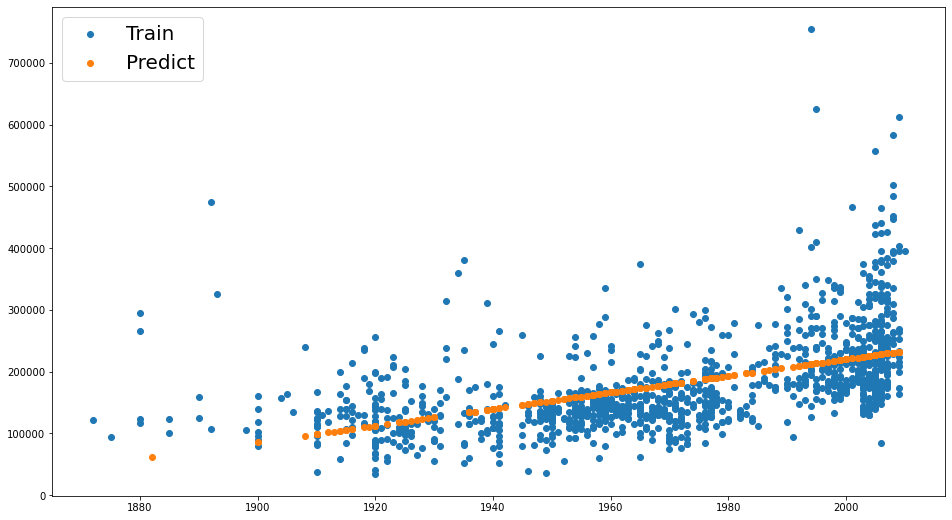

In [19]:
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLogisticRegression(num_iter=9, lr=0.0001, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train,X_test,y_test)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train,y_train,label="Train")
plt.scatter(X_test,y_pred,label="Predict")
plt.legend()
plt.plot();

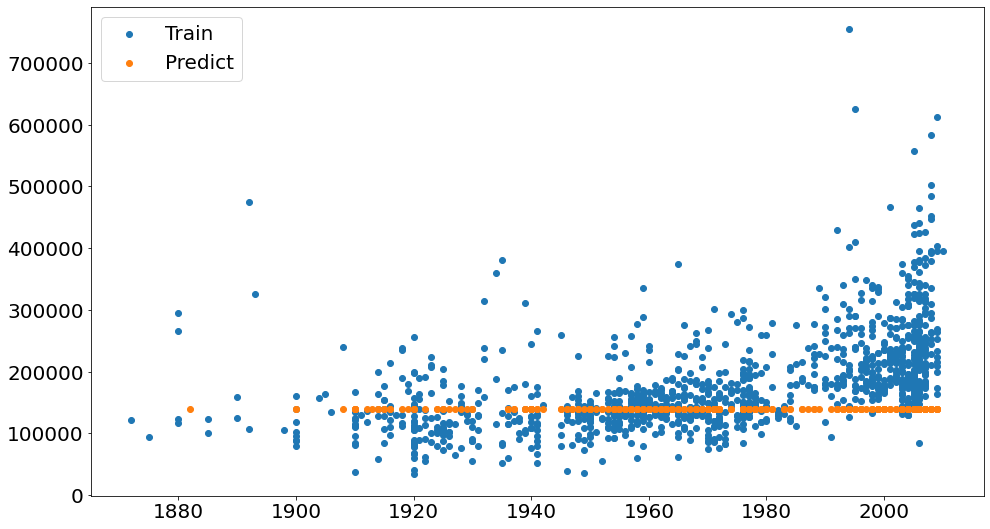

In [20]:
l_regressor_1 = LogisticRegression()
l_regressor_1.fit(X_train,y_train)
y_pred_1 = l_regressor_1.predict(X_test)
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train,y_train,label="Train")
plt.scatter(X_test,y_pred_1,label="Predict")
plt.legend()
plt.plot();

#**[Problem 6] Learning curve plot**

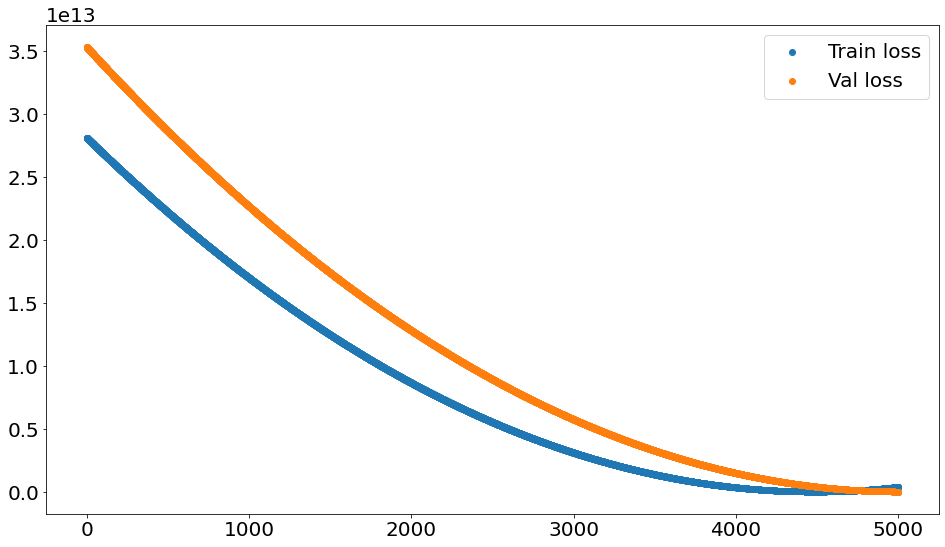

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLogisticRegression(num_iter=5000, lr=0.6, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train,X_test,y_test)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(l_regressor.loss)),l_regressor.loss,label='Train loss')
plt.scatter(range(len(l_regressor.val_loss)),l_regressor.val_loss,label='Val loss')
plt.legend()
plt.plot();

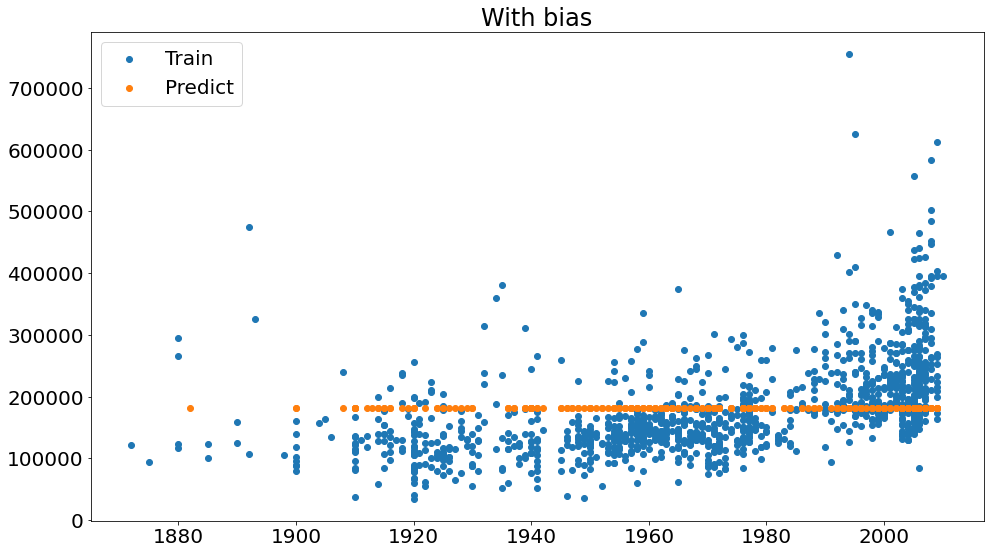

In [22]:
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLogisticRegression(num_iter=9, lr=0.0001, no_bias=False, verbose=False)
l_regressor.fit(X_train,y_train)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(16,9))

plt.title("With bias")
plt.rcParams["font.size"] = 20
plt.scatter(X_train,y_train,label="Train")
plt.scatter(X_test,y_pred,label="Predict")
plt.legend()
plt.plot();

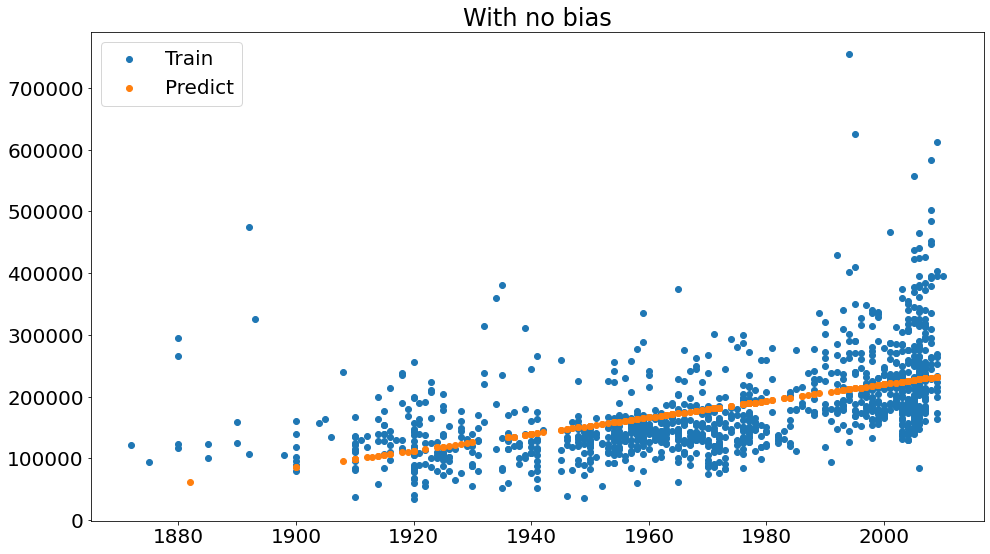

In [23]:
l_regressor = ScratchLogisticRegression(num_iter=9, lr=0.0001, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(16,9))

plt.title("With no bias")
plt.rcParams["font.size"] = 20
plt.scatter(X_train,y_train,label="Train")
plt.scatter(X_test,y_pred,label="Predict")
plt.legend()
plt.plot();

#**[Problem 7] (Advance task) Multidimensional feature quantity**

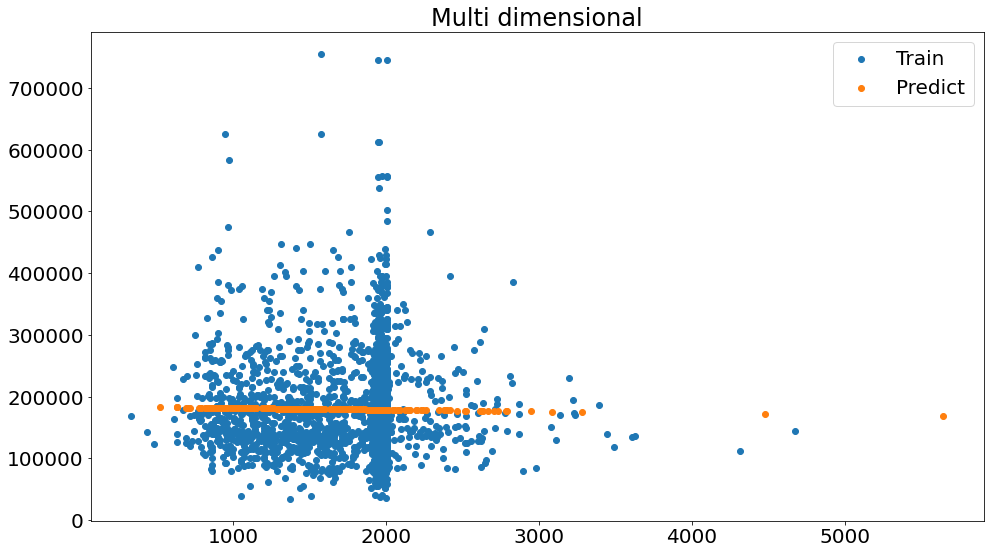

In [24]:
# separating them into variables
X = cleaned_df[['YearBuilt','GrLivArea']].values
y = cleaned_df[['SalePrice']].values
y = np.resize(y,X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLogisticRegression(num_iter=9, lr=0.0001, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(16,9))

plt.title("Multi dimensional")
plt.rcParams["font.size"] = 20
plt.scatter(X_train,y_train,label="Train")
plt.scatter(X_test,y_pred,label="Predict")
plt.legend()
plt.plot();